In [1]:
using BeamLib
using JSON
    
data = JSON.parsefile("manifold_rfsoc_basic_004.json")
display(data["description"])

"Standard 2.4GHz antennas directly attached to ADC-ports A-D on the RFSoC4x2 (roughly 1.75cm between antennas). Complex amplitudes at each position are taken as mean of 10000 samples recorded with active MTS at 100MHz samplerate. Measured at 2.4GHz."

In [ ]:
# Matrix holding samples responsens with following dimension order:
#   propagation_speeds x frequencies x spatial_axes... x elements
# For azimuth and elevation 'spatial_axes' means (all Wavefront formats are supported):
#   propagation_speeds x frequencies x azimuths x elevations x elements
# All size-1 axes can be dropped for simplicity, resulting in:
#   azimuths x elements
responses = transpose(hcat(data["real"] + 1im*data["imag"]))

# create SampledManifold
# NOTE: FLAT EXTRAPOLATION IS USED
#       --> VALUES OUTSIDE BOUNDS USE MIN/MAX INSIDE BOUNDS
#       --> ANGLES ARE NOT WRAPPED AND SAMPLED PHASES FROM THE RESPONSE NOT UNWRAPPED
a = SampledArrayManifold(responses; coords_grid = AzEl(data["azimuths"]'))

# finer angles then original samples
angles = [-180:0.5:180...]
responses = a(2.45e9, deg2rad.(angles)')

4×721 Matrix{ComplexF64}:
 -0.000336641+0.000570309im  …  -0.000330164-0.00063509im
 -0.000645094-0.00034518im       0.000659957-0.000388781im
  -0.00040614-0.000745949im      0.000893872+3.13028e-5im
  0.000412763-0.000458721im      0.000177157+0.00065963im

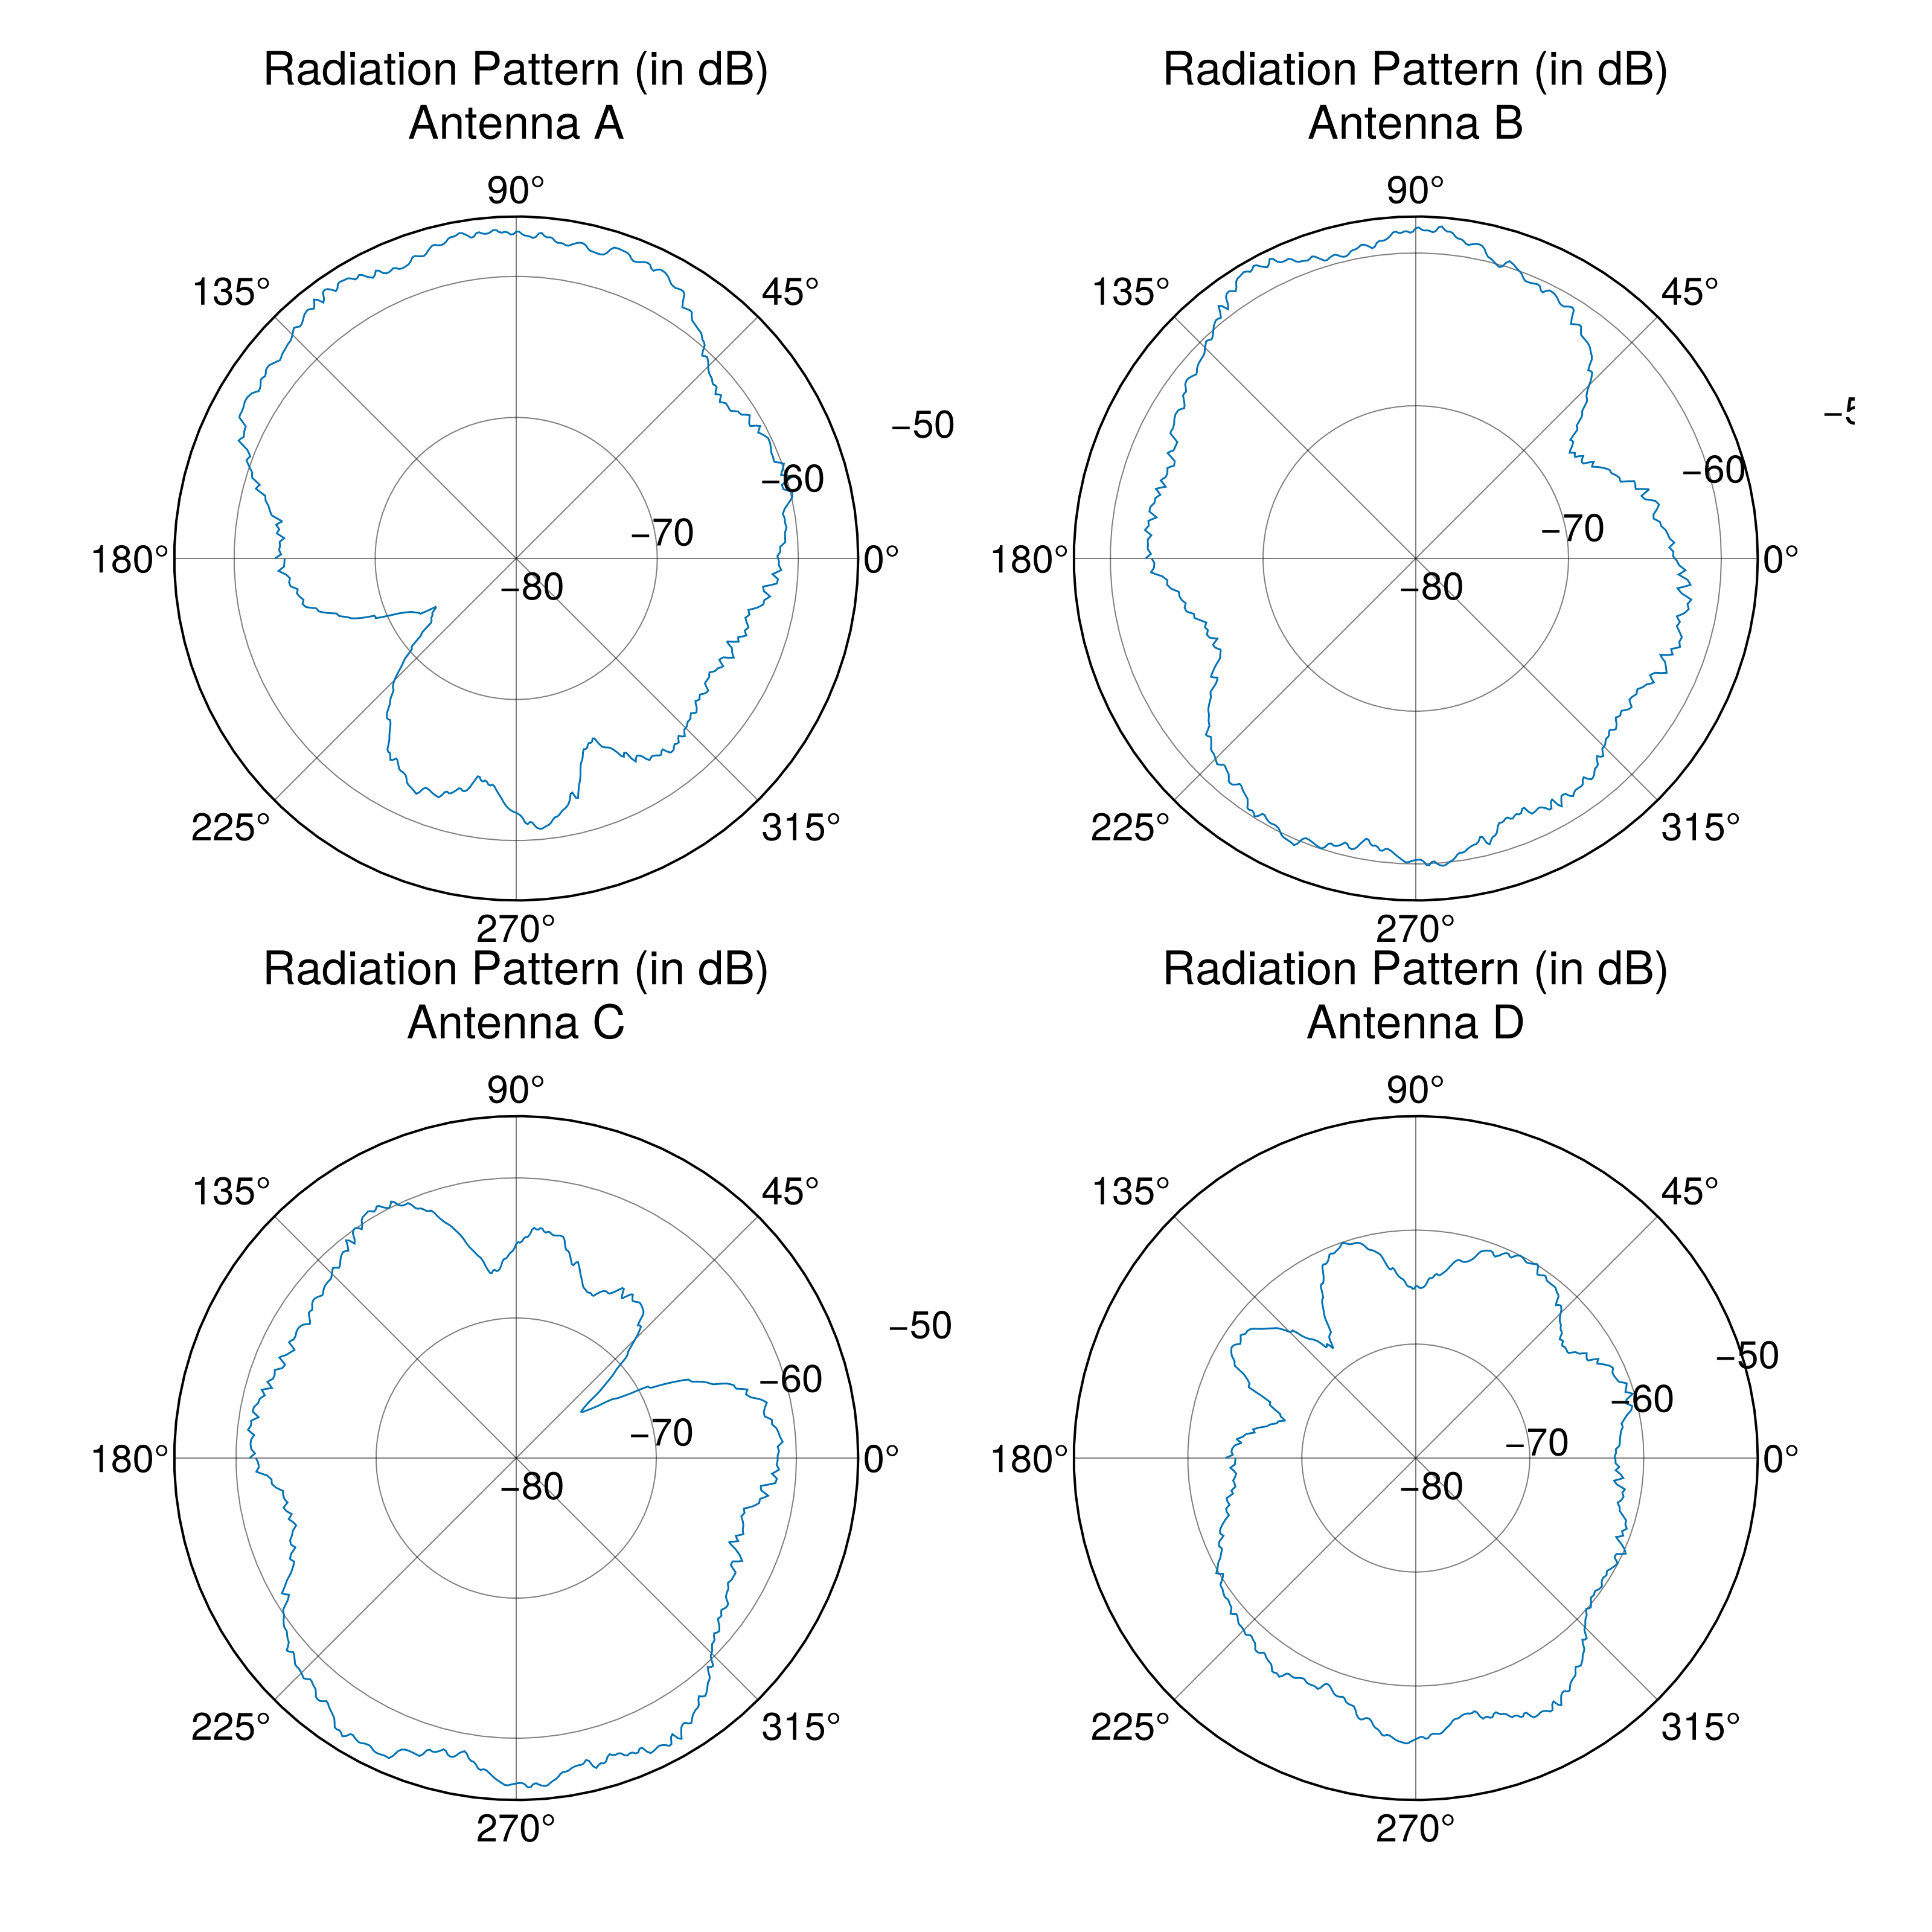

In [ ]:
using CairoMakie
rlow = -80
rticks = 10
rhigh = -50
f = Figure(size = (1600, 1600), fontsize = 32, figure_padding = 64)
ax = PolarAxis(f[1, 1], title = "Radiation Pattern (in dB)\nAntenna A", radius_at_origin = rlow, rticks = rlow:rticks:rhigh, rtickangle=deg2rad(22.5))
lines!(deg2rad.(angles), 20*log10.(abs.(responses[1,:])))
ax = PolarAxis(f[1, 2], title = "Radiation Pattern (in dB)\nAntenna B", radius_at_origin = rlow, rticks = rlow:rticks:rhigh, rtickangle=deg2rad(22.5))
lines!(deg2rad.(angles), 20*log10.(abs.(responses[2,:])))
ax = PolarAxis(f[2, 1], title = "Radiation Pattern (in dB)\nAntenna C", radius_at_origin = rlow, rticks = rlow:rticks:rhigh, rtickangle=deg2rad(22.5))
lines!(deg2rad.(angles), 20*log10.(abs.(responses[3,:])))
ax = PolarAxis(f[2, 2], title = "Radiation Pattern (in dB)\nAntenna D", radius_at_origin = rlow, rticks = rlow:rticks:rhigh, rtickangle=deg2rad(22.5))
lines!(deg2rad.(angles), 20*log10.(abs.(responses[4,:])))
rlims!(ax, rlow, rhigh)
f_all = f